Linear Sorting Algorithms 
===

In [1]:
import ctypes
import numpy as np
import time

Load the shared library into ctypes

In [2]:
clibrary = ctypes.CDLL('./clibrary.dll')

Counting Sort
===============

In [3]:
def counting_sort(array):
    k_max=max(array)
    lenght=len(array)
    #define the type of data that requires the function in C
    clibrary.counting_sort.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int,ctypes.POINTER(ctypes.c_int)]

    #convert the array to a pointer
    array = (ctypes.c_int * lenght)(*array)
    sorted_array = (ctypes.c_int * lenght)()

    #call the function in C
    clibrary.counting_sort(array, k_max,lenght,sorted_array)

    sorted_array = np.ctypeslib.as_array(sorted_array)
    return sorted_array

Radix Sort
==========

In [4]:
def queue_radix_sort(array):
    k_max=max(array)
    lenght=len(array)
    #define the type of data that requires the function in C
    clibrary.counting_sort.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int,ctypes.POINTER(ctypes.c_int)]


    #convert the array to a pointer
    array = (ctypes.c_int * lenght)(*array)
    sorted_array = (ctypes.c_int * lenght)()

    #call the function in C
    #clibrary.radix_sort(array,k_max,lenght,sorted_array)
    clibrary.radix_sort(array, ctypes.c_int(k_max), ctypes.c_int(lenght), sorted_array)

    sorted_array = np.ctypeslib.as_array(sorted_array)
    return sorted_array

Bucket Sort
===============

In [5]:
def bucket_sort(array):
    k_max=max(array)
    lenght=len(array)
    #define the type of data that requires the function in C
    clibrary.bucket_sort.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int,ctypes.POINTER(ctypes.c_int)]


    #convert the array to a pointer
    array = (ctypes.c_int * lenght)(*array)
    sorted_array = (ctypes.c_int * lenght)()

    #call the function in C
    #clibrary.radix_sort(array,k_max,lenght,sorted_array)
    clibrary.bucket_sort(array, ctypes.c_int(k_max), ctypes.c_int(lenght), sorted_array)

    sorted_array = np.ctypeslib.as_array(sorted_array)
    return sorted_array

And we test our algorithms
===========================

In [6]:
random_array = np.random.randint(1,500,20)
print(random_array)

[412   5 162 479  19 131 490 332 443 233 420   4 443 371 430 437   2 460
 250 416]


In [7]:
sorted_array=counting_sort(random_array)
print(sorted_array)

[  4   5  19 131 162 233 250 332 371 412 416 420 430 437 443 443 460 479
 490   0]


In [8]:
sorted_array = queue_radix_sort(random_array)
print(sorted_array)

[  2   4   5  19 131 162 233 250 332 371 412 416 420 430 437 443 443 460
 479 490]


In [9]:
sorted_array = bucket_sort(random_array)
print(sorted_array)

[  2   4   5  19 131 162 233 250 332 371 412 416 420 430 437 443 443 460
 479 490]


Measure the time complexity
===

In [11]:
def time_complexity(max_size,step_size,mean_size):
    #create random arrays of diferent sizes where the number don't repeat
    time_per_size_c=[]
    time_per_size_r=[]
    time_per_size_b=[]
    time_per_size_t=[]
    for i in range(step_size,max_size,step_size):   #this loop is for arrays of diferent sizes
        tiempos_c=[]
        tiempos_r=[]
        tiempos_b=[]
        tiempos_t=[]
        for j in range (mean_size): #this loop is for arrays of the same size, but different numbers. We'll take an average
            array_aleatorio=np.random.choice(np.arange(0,i,1),i,replace=False)

            #define initial time
            random_num_to_search=np.random.randint(0,i,1)
            random_num_to_search=random_num_to_search[0]

            #for counting 
            t1_cs=time.time()
            counting_sort(array_aleatorio)
            #define final time
            t2_cs=time.time()
            tiempos_c.append(t2_cs-t1_cs)

            #now for radix
            t1_rs=time.time()
            queue_radix_sort(array_aleatorio)
            #define final time
            t2_rs=time.time()
            tiempos_r.append(t2_rs-t1_rs)
            

             #now for bucket
            t1_bs=time.time()
            bucket_sort(array_aleatorio)
            #define final time
            t2_bs=time.time()
            tiempos_b.append(t2_bs-t1_bs)

            #and finally for Tim Sort (build in sort of python)
            t1_ts=time.time()
            array_aleatorio=array_aleatorio.tolist()
            array_aleatorio.sort()
            #define final time
            t2_ts=time.time()
            tiempos_t.append(t2_ts-t1_ts)

        #define the mean time of the same size arrays
        tiempo_promedio_c=np.mean(tiempos_c)
        tiempo_promedio_r=np.mean(tiempos_r)
        tiempo_promedio_b=np.mean(tiempos_b)
        tiempo_promedio_t=np.mean(tiempos_t)
        time_per_size_c.append(tiempo_promedio_c)
        time_per_size_r.append(tiempo_promedio_r)
        time_per_size_b.append(tiempo_promedio_b)
        time_per_size_t.append(tiempo_promedio_t)
    return time_per_size_c,time_per_size_r,time_per_size_b,time_per_size_t

Time Complexity Plot

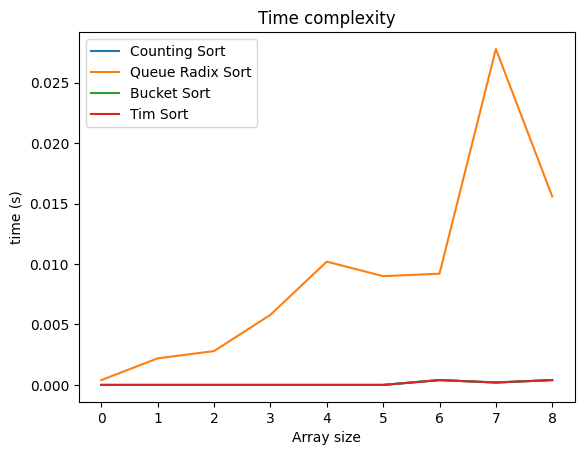

In [16]:
#call the function time_complexity
time_per_size_c,time_per_size_r,time_per_size_b,time_per_size_t=time_complexity(1000,100,5)


#adjust a lineal function
time_per_size_c=np.array(time_per_size_c)
time_per_size_r=np.array(time_per_size_r)
time_per_size_b=np.array(time_per_size_b)
time_per_size_t=np.array(time_per_size_t)
#size=np.arange(10,10000,10)
#m,b=np.polyfit(size,time_per_size_c,1)
#print("m es: ",m)
#print("b es: ",b)
#y=m*size+b

#plot time per size and lineal function
import matplotlib.pyplot as plt
size=np.arange(1,1000,10)
plt.plot(time_per_size_c,label='Counting Sort')
plt.plot(time_per_size_r,label='Queue Radix Sort')
plt.plot(time_per_size_c,label='Bucket Sort')
plt.plot(time_per_size_c,label='Tim Sort')
plt.legend()
#plt.plot(size,y)
plt.ylabel('time (s)')
plt.xlabel('Array size')
plt.title('Time complexity')
plt.show()

as we can see in the graph, the time complexity is O(n), this is because the time grows linearly with the size of the array